In [19]:
import pandas as pd
import numpy as np

In [20]:
data_analytics = pd.read_csv('data_analytics.csv')
df = data_analytics[['Event Date', 'Subscription Offer Type', 'Subscriber ID']]

In [21]:
# all users have 'Free Trial'
(df[df.groupby("Subscriber ID")['Event Date']
    .transform('count') == 1]['Subscription Offer Type'] == 'Free Trial').mean()

1.0

In [22]:
# we can count number of subscriptions for each client to find out his lifetime 
lifetime = df.groupby("Subscriber ID").size()

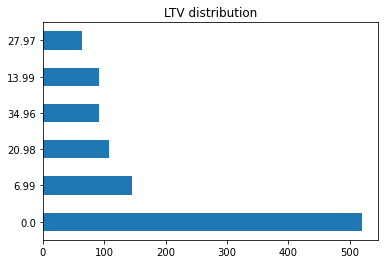

In [23]:
# computing lifetime value including tax 
# first week of lifetime is free - so we discard it
client_LTV_after_tax = round((lifetime - 1) * (9.99 * 0.7), 2)
client_LTV_after_tax.value_counts().plot(kind='barh', title='LTV distribution');

In [24]:
# LTV of each client
client_LTV_df = client_LTV_after_tax.to_frame(name="LTV")
client_LTV_df['lifetime'] = lifetime
print("mean LTV after tax =", client_LTV_df['LTV'].mean())
client_LTV_df.head()

mean LTV after tax= 9.339470068694727


,LTV,lifetime
Subscriber ID,,
223411322456765433,34.96,6
223411322456765434,34.96,6
223411322456765435,34.96,6
223411322456765437,34.96,6
223411322456765438,34.96,6


## Also we could compute the same using formula from task description

In [43]:
# First we compute number of clients who were with us for 1 week, 2 weeks and so on
tmp = df.groupby("Subscriber ID")["Subscription Offer Type"].apply(
    list).apply(str).value_counts().to_frame()
tmp = pd.DataFrame({"option": tmp['Subscription Offer Type'].index, 
                    "count": tmp['Subscription Offer Type'].values}).sort_values('option')
tmp['counts_cumsum'] = np.cumsum(tmp['count'])

In [44]:
# Then we compute mean LTV for each week using conversion rate and dev proceeds after tax
comission = 0.3
dev_proceeds = 9.99 * (1 - comission)
counts = np.flip(tmp.counts_cumsum)

periods = []

for i, j in zip(counts[1:], counts[:-1]):
    conversion_rate = i / j
    if len(periods) == 0:
        periods.append(dev_proceeds*conversion_rate)
    else:
        periods.append(periods[-1]*conversion_rate)

In [31]:
# the result is slightly different due to rounding error
print("mean LTV after tax =", np.sum(periods))

mean LTV after tax= 9.340012757605496
